Allison Forte

March 1, 2023

DSC 550

Exercise 10.2: Milestone 3

# Term Project Milestone 1
## Data Selection and EDA

### Begin Milestone 1 with a 250-500-word narrative describing your original idea for the analysis/model building business problem. Clearly identify the problem you will address and the target for your model. 

Data:  https://www.kaggle.com/datasets/arathipraj/house-data?select=house_data.csv

Houses are bought and sold every day. House prices are important to the buyer and seller as well as real estate agents involved in the transaction. House prices and purchase and sale numbers are indicative of the overall strength of the economy. Especially in recent years, home prices have been under scrutiny as people have seen house prices skyrocket.  

Being able to accurately predict the sale price of a home based on features of the home would benefit many people. Individual homeowners could calculate their home’s likely sale price and could even see the change in likely sale price with a renovation that would change their home’s features. Real estate agents or realty companies could also  benefit from a simple method to calculate the likely sale price. This could allow real estate agents to target specific homes when encouraging homeowners to sell and could simplify their job when homeowners come to them, ready to sell their house.  

One challenge to accomplishing this is that the market has a significant impact on the sale price of a home. Determining a method to predict sale price for homes will be useful to present to realty companies in various regions so they can apply the method to their own records. This would allow them to have their own model specific to their region. This could be easier than actively finding comparable houses in the area and look at past sale prices one by one. 

The dataset used to create this method will include homes in King County, Washington. This dataset is available through Kaggle and has over 21,000 entries. (https://www.kaggle.com/datasets/arathipraj/house-data?select=house_data.csv) A data set of this size will allow for training and testing data. The data included in this dataset is standard housing data including the number of bedrooms, number of bathrooms, sqft of the home, lot size, year built, year renovated, and information about the view from the home among other factors.  

The goal is to identify which factors have the largest impact on the sale price and create a method for using these factors to accurately predict the sale price. In order to determine if the method is accurate, the percent difference between actual sale price and predicted sale price will be looked at.  

Given that the data is specific to King County, it will not be possible to tell if the output is accurate for homes outside of King County. Data from homes outside King County could be used to test the accuracy of the model in other regions or other data could be used following the same steps in this project to create models for other regions.  

### Complete a graphical analysis creating a minimum of four graphs. Label your graphs appropriately and explain/analyze the information provided by each graph. Your analysis should begin to answer the question(s) you are addressing.

In [140]:
# Install libraries, load data, and display the first few rows

import pandas as pd
import seaborn as sns

housing_data = pd.read_csv('/Users/allison.forte/Downloads/house_data.csv')
housing_data.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [141]:
# Display the column names

housing_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Text(0.5, 1.0, 'Correlation of price and sqft of living space')

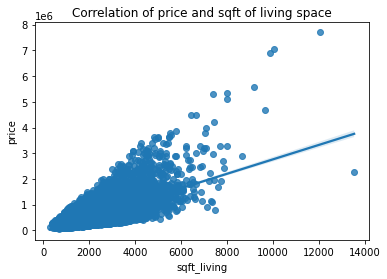

In [142]:
# Graph 1
# Does sqft of living space correlate strongly with price?

graph_1 = sns.regplot(x = housing_data['sqft_living'], y = housing_data['price'])
graph_1.set_title('Correlation of price and sqft of living space')

This graph indicates that the size of the living space correlates strongly with the sale price. This is to be expected. There are clearly a few outliers that have extremely large living spaces. The homes with extremely large living space and the homes that sold for extremely high prices will likely be harder to accurately predict. 

Count of bedrooms:
 3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64


/Users/allison.forte/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

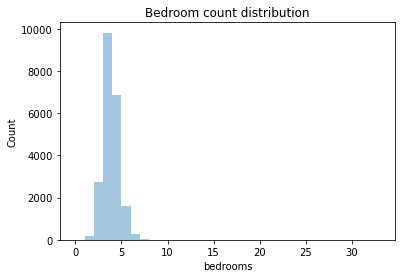

In [143]:
# Graph 2 and 3
# Analyze number of bedrooms and number of bathrooms

# Bedrooms: Calculate and display number of homes with each bedroom count, display a histogram

print('Count of bedrooms:\n', housing_data["bedrooms"].value_counts())

graph_2 = sns.distplot(housing_data["bedrooms"],bins = 33, hist = True, kde = False)
graph_2.set_title('Bedroom count distribution')
graph_2.set_ylabel('Count')

This graph shows that the data set includes a few homes with an extreme number of bedrooms. In order for this model to accurately predict average family homes' sale price, removing the outliers will be necessary. Focusing on homes with 1 to 6 bedrooms will likely create the most accurate model. 

Count of bathrooms:
 2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64


Text(0, 0.5, 'Count')

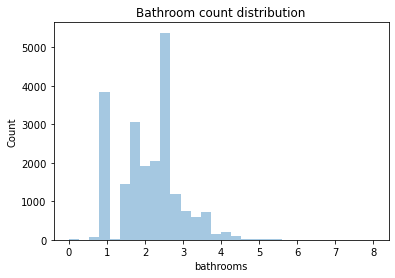

In [144]:
# Bedrooms: Calculate and display number of homes with each bathroom count, display a histogram

print('Count of bathrooms:\n', housing_data['bathrooms'].value_counts())

graph_3 = sns.distplot(housing_data['bathrooms'], bins = 30, hist = True, kde = False)
graph_3.set_title('Bathroom count distribution')
graph_3.set_ylabel('Count')

Similar to the distribution of bedroom count, there are a few outliers in the dataframe with many bathrooms. In order to create an accurate model for average family homes, the focus for this analysis should be homes with 1 to 4.5 bathrooms.

Text(0.5, 1.0, 'Correlation of price and year built')

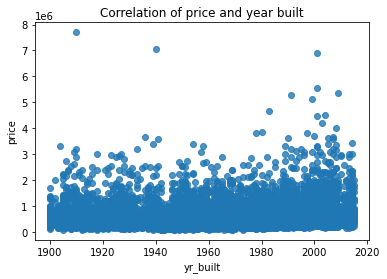

In [145]:
# Graph 4
# Check correlation of year built with price

graph_4 = sns.regplot(x = housing_data['yr_built'], y = housing_data['price'])
graph_4.set_title('Correlation of price and year built')

This graph shows that there is a correlation between the year a house was built and the price it sold for. The graph shows that the outliers in this dataset are skewing the relationship. Excluding the homes that sold significantly above average (multi-million dollar homes) will help to ensure accuracy of this model. 

/Users/allison.forte/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

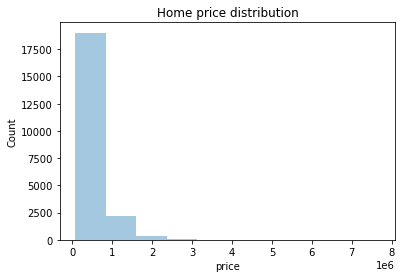

In [146]:
# Graph 5
# What does the distribution of home prices in this dataset look like?

graph_5 = sns.distplot(housing_data['price'], bins = 10, hist = True, kde = False)
graph_5.set_title('Home price distribution')
graph_5.set_ylabel('Count')

The home prices in this dataset are heavily skewed to the lower end of the distribution. In order to create a useful model, this analysis will exclude the outliers that are multi-million dollar homes. This analysis will focus on homes that sold for less than 2 million dollars. 

### Write a short overview/conclusion of the insights gained from your graphical analysis.

The graphical analysis performed on this dataset indicates the need for refining of the data. This data set contains over 21 thousand entries. Several homes are outliers in different ways. In order to create a useful model, excluding these outliers will be important. Additional data preparation will include removing the homes that have excessive bedrooms and bathrooms as well as removing homes that sold for significantly more than others. It is likely that the outliers are all the same for homes (the homes with extremely high bedrooms/bathrooms are likely the ones that sold for much higher price and have much higher square footage). 

These graphs show that there are several factors that do correlate with price. Further analysis should lead to a model that can predict sale price. 

# Term Project Milestone 2
## Data Preparation


Explain your process at each step. You can use any methods/tools you think are most appropriate. Do what makes the most sense for your data/problem. This will vary greatly among different projects. Be careful to avoid data snooping in these steps.

In [147]:
# Drop columns that will not be useful

# Drop id (a unique id for each home sold) as we do not need to identify specific homes
housing_data = housing_data.drop('id', axis = 1)  

In [148]:
# Deal with missing data

# Check for missing values in the dataframe
housing_data.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

The count of NA values shows there are no missing values to deal with

In [149]:
# Turn grade into categories (grade - An index from 1 to 13 , where 1-3 falls short of building construction 
# and design, 7 has an average level of construction and design , and 11-13 have a high quality level of 
# construction and design)

housing_data['grade'] = housing_data['grade'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], 
                                                      ['Low', 'Low', 'Low', 'Average', 'Average', 'Average', 
                                                       'Average', 'Average', 'Average', 'Average', 'High', 
                                                       'High', 'High'])

In [150]:
# Turn view into categories (view is rated 0-4 with 0 = worst, 4 = best)
# 0-1 = poor view, 2 = average view, 3-4 = good view

housing_data['view'] = housing_data['view'].replace([0, 1, 2, 3, 4], ['Poor', 'Poor', 'Typical', 'Good', 'Good'])

In [151]:
# Check for duplicates

duplicate = housing_data[housing_data.duplicated()]
 
print('Number of duplicated rows:', duplicate.shape[0])

Number of duplicated rows: 0


In [152]:
# Check for outliers

original_rows = housing_data.shape[0]
housing_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,3.409430,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.650743,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,4.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


We can see there are outliers for bedroom count (mean = 3.37, max = 33) and bathroom count (mean = 2.1, max = 8)

There are also outliers based on sqft_living (mean = 2079, max = 13540)

In [153]:
# Drop outliers

housing_data = housing_data.drop(housing_data[housing_data['bedrooms'] > 10].index)
housing_data = housing_data.drop(housing_data[housing_data['bathrooms'] > 4].index)
housing_data = housing_data.drop(housing_data[housing_data['sqft_living'] > 5000].index)

new_rows = housing_data.shape[0]
removed_rows = original_rows - new_rows

In [154]:
print('{} rows of data were droped as outliers'.format(removed_rows))

372 rows of data were droped as outliers


In [155]:
# Create dummies for grade

grade_dummies = pd.get_dummies(housing_data['grade'])

housing_data = housing_data.join(grade_dummies)

In [156]:
# Create dummies for view

view_dummies = pd.get_dummies(housing_data['view'])

housing_data = housing_data.join(view_dummies)

In [157]:
# Generalize year built to decade built

housing_data['yr_built'] = housing_data['yr_built']//10*10

housing_data = housing_data.rename(columns = {'yr_built' : 'decade_built'})

### Added since Milestone 2

In [158]:
# Convert lat and long to a geohash, then drop lat and long columns

import pygeohash as gh

housing_data['geohash'] = housing_data.apply(lambda x: gh.encode(x.lat, x.long, precision=5), axis=1)
housing_data =  housing_data.drop(['lat', 'long'], axis = 1)  

In [159]:
# drop columns that are no longer needed due to use of dummy columns

housing_data = housing_data.drop('view', axis = 1)  
housing_data = housing_data.drop('grade', axis = 1)


# drop date

housing_data = housing_data.drop('date', axis = 1)  

In [160]:
# Confirm all 'price' entries are numbers (analysis showed some prices were incorrectly formatted)

housing_data[pd.to_numeric(housing_data['price'], errors='coerce').notnull()]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,sqft_above,sqft_basement,...,zipcode,sqft_living15,sqft_lot15,Average,High,Low,Good,Poor,Typical,geohash
0,221900,3,1.00,1180,5650,1.0,0,3,1180,0,...,98178,1340,5650,1,0,0,0,1,0,c23n3
1,538000,3,2.25,2570,7242,2.0,0,3,2170,400,...,98125,1690,7639,1,0,0,0,1,0,c23p2
2,180000,2,1.00,770,10000,1.0,0,3,770,0,...,98028,2720,8062,1,0,0,0,1,0,c23pd
3,604000,4,3.00,1960,5000,1.0,0,5,1050,910,...,98136,1360,5000,1,0,0,0,1,0,c22yq
4,510000,3,2.00,1680,8080,1.0,0,3,1680,0,...,98074,1800,7503,1,0,0,0,1,0,c23ny
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000,3,2.50,1530,1131,3.0,0,3,1530,0,...,98103,1530,1509,1,0,0,0,1,0,c22zr
21609,400000,4,2.50,2310,5813,2.0,0,3,2310,0,...,98146,1830,7200,1,0,0,0,1,0,c22yr
21610,402101,2,0.75,1020,1350,2.0,0,3,1020,0,...,98144,1020,2007,1,0,0,0,1,0,c23nc
21611,400000,3,2.50,1600,2388,2.0,0,3,1600,0,...,98027,1410,1287,1,0,0,0,1,0,c23nq


In [161]:
# drop geohash since it will not work in a linear regression model

housing_data = housing_data.drop('geohash', axis = 1)  

In [162]:
# Check final dataframe

housing_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,sqft_above,sqft_basement,...,yr_renovated,zipcode,sqft_living15,sqft_lot15,Average,High,Low,Good,Poor,Typical
0,221900,3,1.00,1180,5650,1.0,0,3,1180,0,...,0,98178,1340,5650,1,0,0,0,1,0
1,538000,3,2.25,2570,7242,2.0,0,3,2170,400,...,1991,98125,1690,7639,1,0,0,0,1,0
2,180000,2,1.00,770,10000,1.0,0,3,770,0,...,0,98028,2720,8062,1,0,0,0,1,0
3,604000,4,3.00,1960,5000,1.0,0,5,1050,910,...,0,98136,1360,5000,1,0,0,0,1,0
4,510000,3,2.00,1680,8080,1.0,0,3,1680,0,...,0,98074,1800,7503,1,0,0,0,1,0


In [163]:
# Split the data with price as the target to prepare for modeling

from sklearn.model_selection import train_test_split

y = housing_data[['price']]
x = housing_data.drop('price', axis = 1)  

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.2) 

# Term Project Milestone 3
## Model Building and Evaluation

You are required to train and evaluate at least one model in this milestone.  

Write a short overview/conclusion of the insights gained from your model building/evaluation.

For this project we are looking for the predicted value of a home. We are looking for a number so we are looking for a regression model rather than a classification or a clustering model. 

We will use a Linear Regression model and determine the most impactful parameters. 

In [164]:
# Run a standard linear regression model and check the accuracy using R2-value and RMSE on the test set

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


model = LinearRegression()
model.fit(x_train, y_train)

print('R squared for the test data is', model.score(x_test, y_test)) 
print('RMSE for the test data is', mean_squared_error(y_test, model.predict(x_test), squared=False)) 

R squared for the test data is 0.5769640961403748
RMSE for the test data is 203806.36225535127


In [165]:
# Now determine the most impactful features

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


x_train_scaled = StandardScaler().fit_transform(x_train)  # scale the data first

pca = PCA(n_components=.9)  # limit features while keeping 90% of the variance

principalComponents_train = pca.fit_transform(x_train_scaled)


In [166]:
print('Original number of features:', x_train.shape[1])
print('Reduced number of features:', principalComponents_train.shape[1])  # compare number of features

Original number of features: 20
Reduced number of features: 12


In [167]:
# Transform the test features with the same PCA

x_test_scaled = StandardScaler().fit_transform(x_test)

principalComponents_test = pca.transform(x_test_scaled)

In [168]:
# Run a linear regression with the PCA data and report the R2-value and RMSE on the test set

PCA_model = LinearRegression()
PCA_model.fit(principalComponents_train, y_train)

print('R squared for the test data with the PCA model is', PCA_model.score(principalComponents_test, y_test)) 
print('RMSE for the test data with the PCA model is', mean_squared_error
      (y_test, PCA_model.predict(principalComponents_test), squared=False)) 

R squared for the test data with the PCA model is 0.5304085679837806
RMSE for the test data with the PCA model is 214728.26020348675


We can see that the PCA model accounts for slightly less variance in the data than the standard regression model. However, the PCA model only used 12 features rather than 20 making it a significantly simpler model. We know that no model will predict house prices completely correctly so we can conclude that a slight drop in percent of variability accounted for but with a significantly simpler model is worth it. 

In [169]:
# Now try using only the features that have the most variance

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()  # first, scale the data

x_train_minmax = scaler.fit_transform(x_train)

In [170]:
# Find the features that have the highest variance

from sklearn.feature_selection import VarianceThreshold

thresholder = VarianceThreshold(threshold = .04)

x_train_high_variance = thresholder.fit_transform(x_train_minmax)

print('Original number of features:', x_train.shape[1])
print('Reduced number of features:', x_train_high_variance.shape[1])

Original number of features: 20
Reduced number of features: 5


In [171]:
# Transform the test features with the min-max scaler

x_test_minmax = scaler.fit_transform(x_test)

x_test_high_variance = thresholder.transform(x_test_minmax)

In [172]:
# Run a linear regression with the high variance data and report the R2-value and RMSE

high_variance_model = LinearRegression()
high_variance_model.fit(x_train_high_variance, y_train)

print('R squared for the test data with the high variance model is', high_variance_model.score
      (x_test_high_variance, y_test)) 
print('RMSE for the test data with the high variance model is', mean_squared_error
      (y_test, high_variance_model.predict(x_test_high_variance), squared=False)) 

R squared for the test data with the high variance model is 0.20138825657835335
RMSE for the test data with the high variance model is 280025.10529759503


By using only the features with the most variance, we limited our features to only 5. This proved to be an unwise choice as our model accounted for less than 20% of the variability in the data. Giving up so many features did not allow for a useful model. 

## Conclusion

Home values are important influencing individuals' net worth and ability to access equity in their home in addition, of course, to determining where one can live.

With that in mind, creating a simple algorythm to predict home prices will not be 100% accurate even using all possible home features. Today, realtors rely on comparable listings taking into account the home's location, condition, and features.

In this project we were able to prepare the data and identify a linear regression model using about half of the possible features that was able to account for about half of the variation in the data. Additional factors such as location would be necessary in order to get more accurate price predictions. 

Even though this model will not give an extremely accurate value, it will give a solid starting point, allowing homeowners to get a sense of their home's value before digging in deeper to get more specific. 